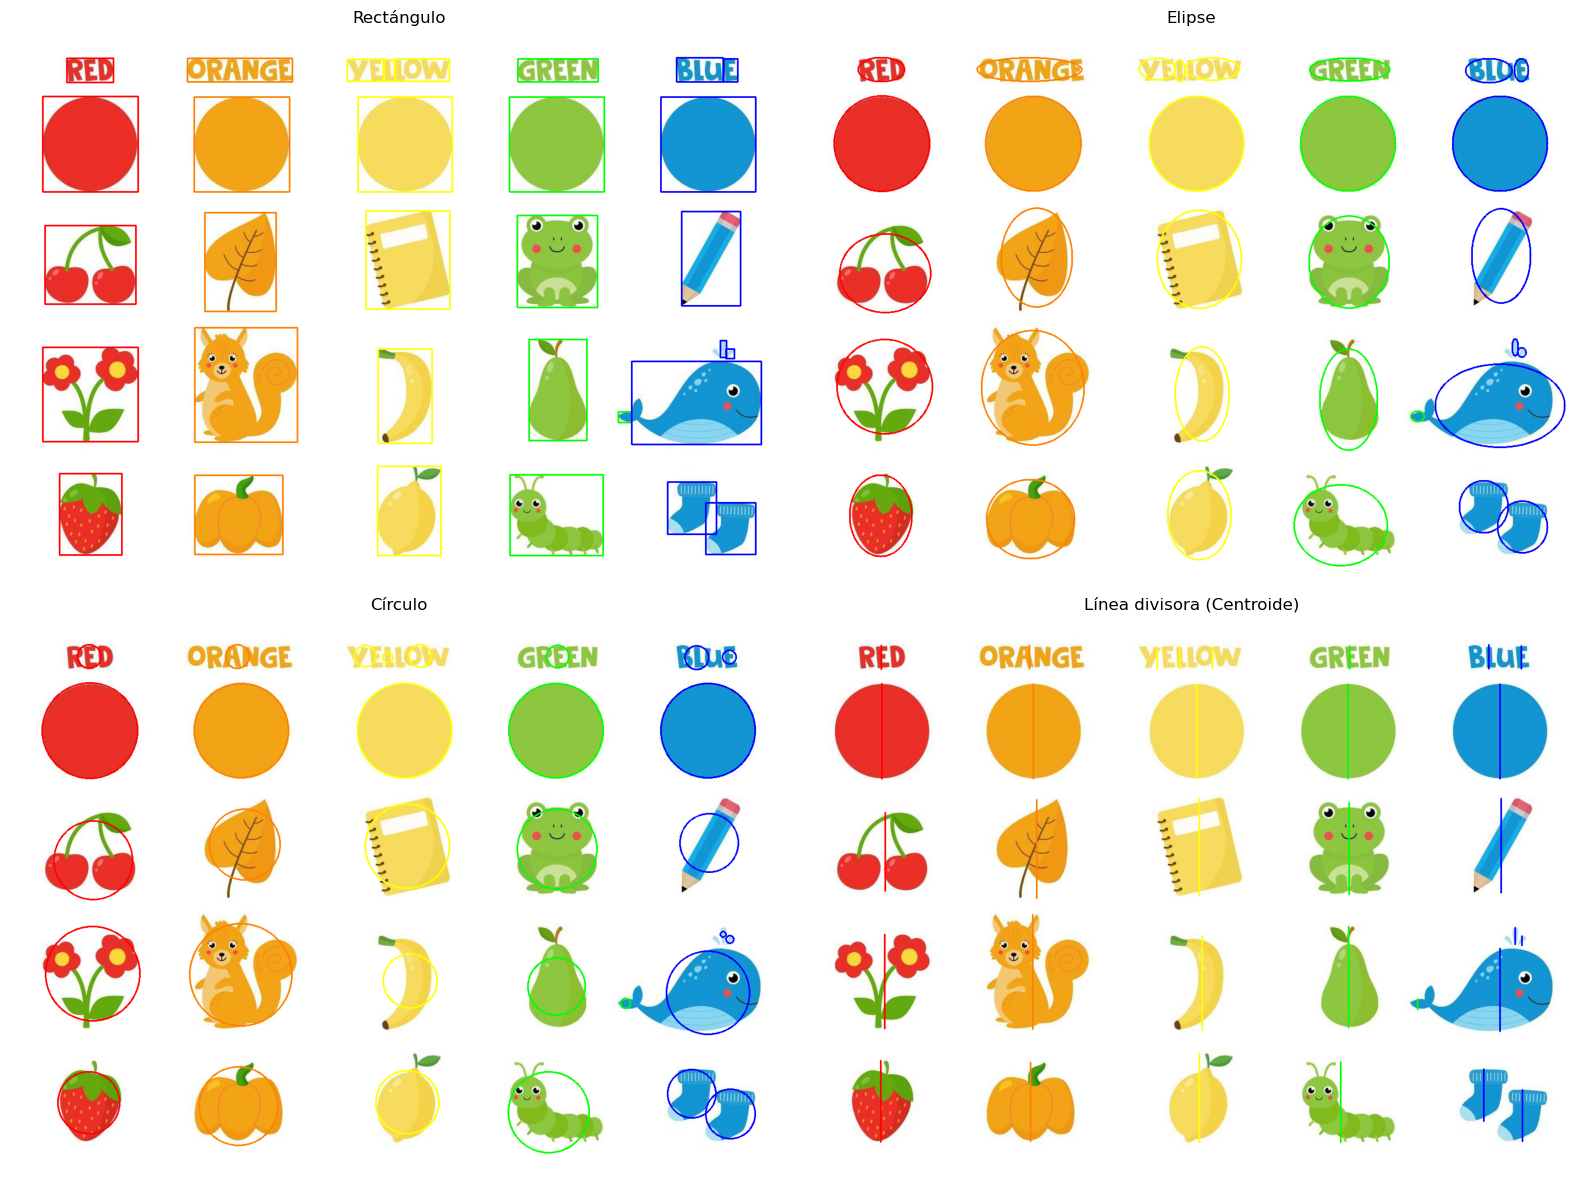

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analizar_y_dibujar_objetos(img, min_area=100):
    alto, ancho = img.shape[:2]
    num_colores = 5
    ancho_columna = ancho // num_colores
    nombres_colores = ['red', 'orange', 'yellow', 'green', 'blue']
    colores_bgr = [(0,0,255), (0,128,255), (0,255,255), (0,255,0), (255,0,0)]
    
    resultados = []

    # Crear imágenes para cada tipo de figura (copias de la original)
    img_rect = img.copy()
    img_ellipse = img.copy()
    img_circulo = img.copy()
    img_linea = img.copy()

    for i in range(num_colores):
        x_ini = i * ancho_columna
        x_fin = (i + 1) * ancho_columna
        subimg = img[:, x_ini:x_fin]
        gris = cv2.cvtColor(subimg, cv2.COLOR_BGR2GRAY)
        _, binaria = cv2.threshold(gris, 240, 255, cv2.THRESH_BINARY_INV)

        # Eliminar ruido
        kernel = np.ones((3, 3), np.uint8)
        binaria = cv2.morphologyEx(binaria, cv2.MORPH_OPEN, kernel)
        binaria = cv2.morphologyEx(binaria, cv2.MORPH_CLOSE, kernel)

        contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        objetos_validos = [c for c in contornos if cv2.contourArea(c) > min_area]

        color = colores_bgr[i]

        for c in objetos_validos:
            c_shifted = c + np.array([[[x_ini, 0]]])
            x, y, w, h = cv2.boundingRect(c_shifted)
            M = cv2.moments(c_shifted)
            if M['m00'] == 0:
                continue
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            area = cv2.contourArea(c_shifted)
            perimetro = cv2.arcLength(c_shifted, True)
            resultados.append({'color': nombres_colores[i], 'area': area, 'perimetro': perimetro, 'centroide': (cx, cy)})

            # Dibujar formas sobre cada imagen
            cv2.rectangle(img_rect, (x, y), (x + w, y + h), color, 2)
            cv2.ellipse(img_ellipse, ((cx, cy), (w, h), 0), color, 2)
            radio = min(w, h) // 2
            cv2.circle(img_circulo, (cx, cy), radio, color, 2)
            cv2.line(img_linea, (cx, y), (cx, y + h), color, 2)

    # Mostrar las imágenes en subplots
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    axs[0, 0].imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title('Rectángulo')
    axs[0, 1].imshow(cv2.cvtColor(img_ellipse, cv2.COLOR_BGR2RGB))
    axs[0, 1].set_title('Elipse')
    axs[1, 0].imshow(cv2.cvtColor(img_circulo, cv2.COLOR_BGR2RGB))
    axs[1, 0].set_title('Círculo')
    axs[1, 1].imshow(cv2.cvtColor(img_linea, cv2.COLOR_BGR2RGB))
    axs[1, 1].set_title('Línea divisora (Centroide)')
    for ax in axs.flat:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    return resultados

# USO:
img = cv2.imread('colores.jpg')
resultados = analizar_y_dibujar_objetos(img)


Área: 3.00, Perímetro: 8.83, Centroide: (670, 717)
Área: 394.50, Perímetro: 112.67, Centroide: (638, 708)
Área: 1.50, Perímetro: 6.24, Centroide: (538, 668)
Área: 1.50, Perímetro: 8.24, Centroide: (544, 663)
Área: 229.00, Perímetro: 71.94, Centroide: (525, 669)
Área: 252.00, Perímetro: 172.37, Centroide: (654, 651)
Área: 2.00, Perímetro: 6.83, Centroide: (533, 640)
Área: 0.50, Perímetro: 3.41, Centroide: (1008, 623)
Área: 1124.00, Perímetro: 594.50, Centroide: (632, 688)
Área: 9.50, Perímetro: 26.73, Centroide: (711, 605)
Área: 2887.50, Perímetro: 308.63, Centroide: (571, 624)
Área: 19.50, Perímetro: 41.21, Centroide: (696, 598)
Área: 0.50, Perímetro: 6.24, Centroide: (685, 593)
Área: 3.50, Perímetro: 11.41, Centroide: (730, 590)
Área: 102.00, Perímetro: 106.85, Centroide: (675, 602)
Área: 49.00, Perímetro: 67.80, Centroide: (517, 599)
Área: 5.00, Perímetro: 20.83, Centroide: (0, 590)
Área: 137.50, Perímetro: 120.18, Centroide: (567, 563)
Área: 16778.00, Perímetro: 993.13, Centroide: (

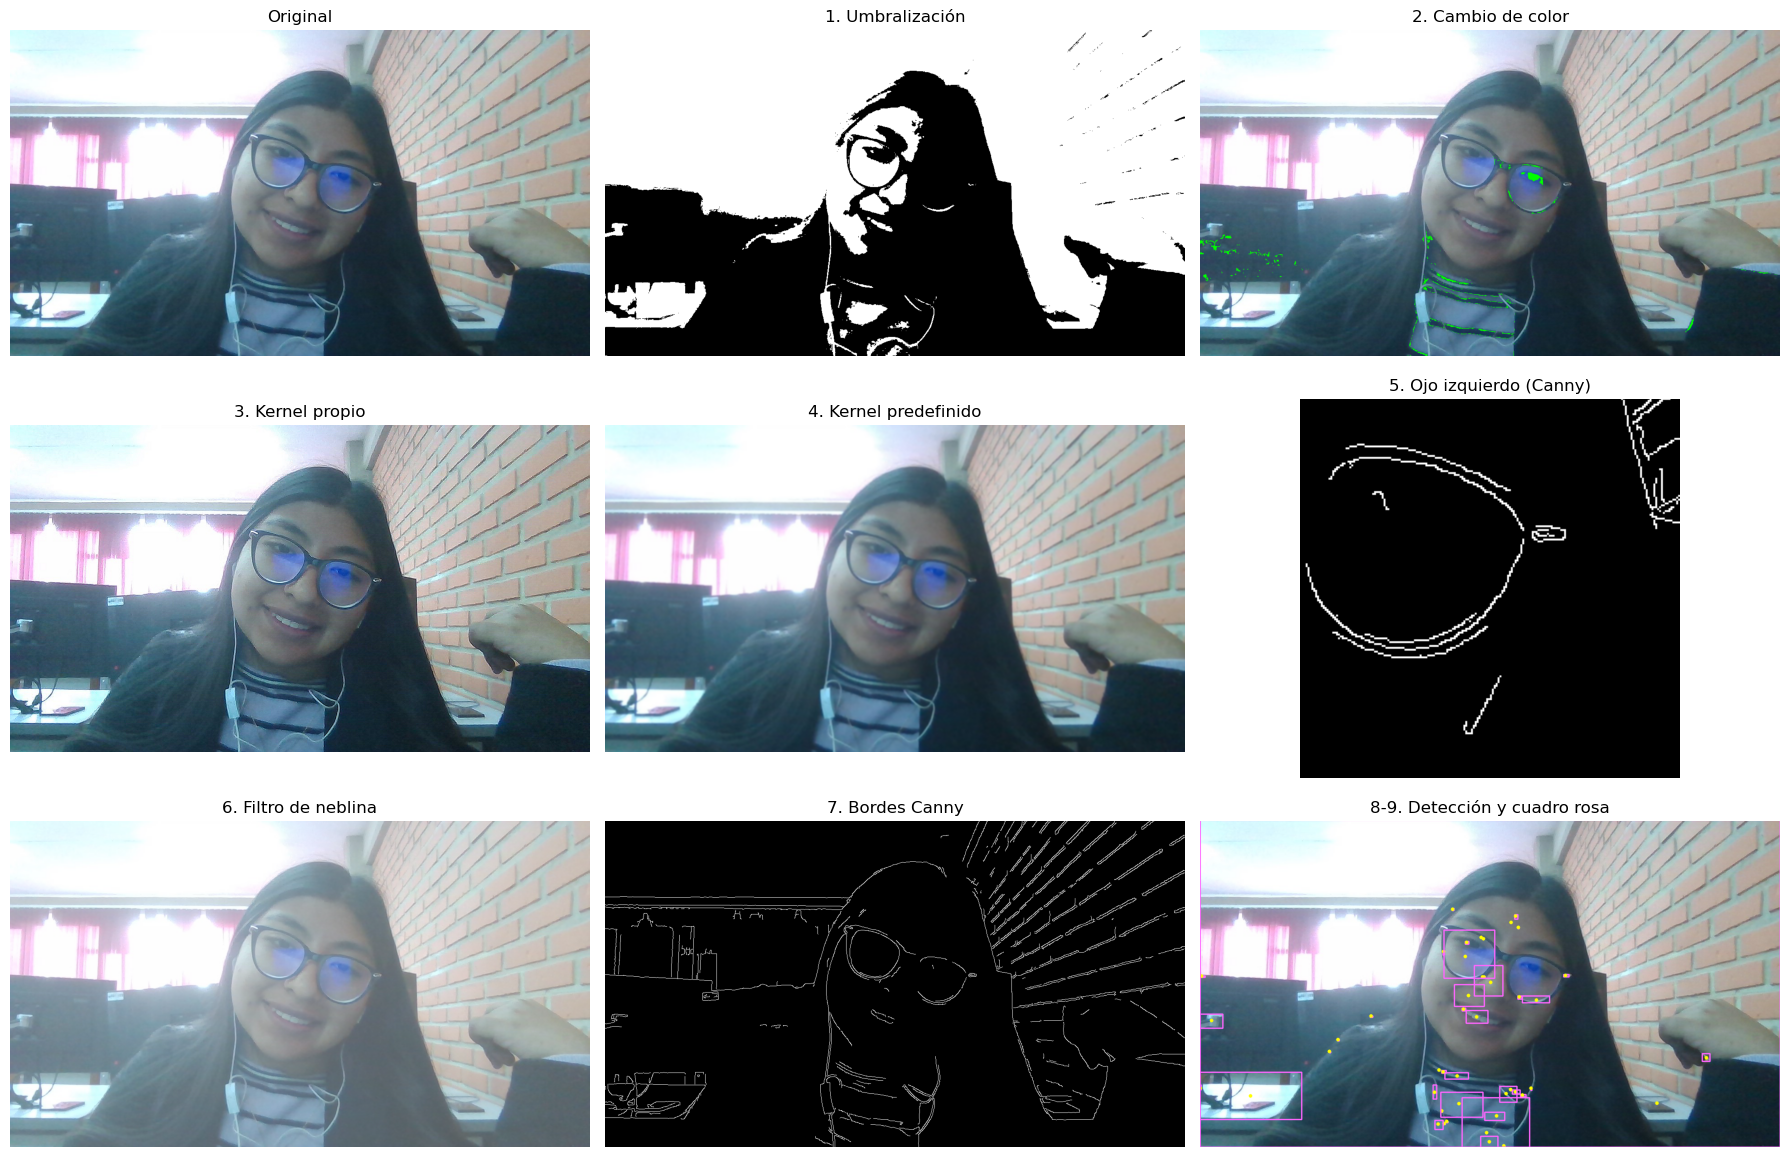

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen
img = cv2.imread("nataliaa.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. Umbralización
_, img_thresh = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY)

# 2. Cambio de color (azul a verde)
img_cambio = img.copy()
mask_azul = cv2.inRange(img_cambio, (100, 0, 0), (255, 80, 80))
img_cambio[mask_azul > 0] = (0, 255, 0)
img_cambio = cv2.cvtColor(img_cambio, cv2.COLOR_BGR2RGB)

# 3. Convolución con kernel propio (sharpen)
kernel_propio = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])
img_sharp = cv2.filter2D(img, -1, kernel_propio)
img_sharp = cv2.cvtColor(img_sharp, cv2.COLOR_BGR2RGB)

# 4. Convolución con kernel predefinido (Gaussian blur)
img_blur = cv2.GaussianBlur(img, (7, 7), 0)
img_blur = cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB)

# 5. Recorte de ojo izquierdo y Canny (ajustado a la imagen)
x, y, w, h = 680, 270, 200, 200
ojo = img_gray[y:y+h, x:x+w]
ojo_canny = cv2.Canny(ojo, 50, 150)

# 6. Filtro de neblina
neblina = np.full_like(img, 255)
img_neblina = cv2.addWeighted(img, 0.7, neblina, 0.3, 0)
img_neblina = cv2.cvtColor(img_neblina, cv2.COLOR_BGR2RGB)

# 7. Bordes de imagen completa
img_bordes = cv2.Canny(img, 100, 200)

# 8. Área, perímetro, centroide y dibujo
contornos, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_dibujo = img.copy()
for c in contornos:
    area = cv2.contourArea(c)
    perimetro = cv2.arcLength(c, True)
    M = cv2.moments(c)
    if M['m00'] == 0:
        continue
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    x_box, y_box, w_box, h_box = cv2.boundingRect(c)
    # 9. Cuadro rosa
    cv2.rectangle(img_dibujo, (x_box, y_box), (x_box+w_box, y_box+h_box), (255, 102, 255), 2)
    cv2.circle(img_dibujo, (cx, cy), 4, (0, 255, 255), -1)
    print(f"Área: {area:.2f}, Perímetro: {perimetro:.2f}, Centroide: ({cx}, {cy})")

img_dibujo = cv2.cvtColor(img_dibujo, cv2.COLOR_BGR2RGB)

# Mostrar todas las imágenes
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
axs = axs.ravel()

imagenes = [
    (img_rgb, "Original"),
    (img_thresh, "1. Umbralización"),
    (img_cambio, "2. Cambio de color"),
    (img_sharp, "3. Kernel propio"),
    (img_blur, "4. Kernel predefinido"),
    (ojo_canny, "5. Ojo izquierdo (Canny)"),
    (img_neblina, "6. Filtro de neblina"),
    (img_bordes, "7. Bordes Canny"),
    (img_dibujo, "8-9. Detección y cuadro rosa")
]

for i, (img_plot, title) in enumerate(imagenes):
    if len(img_plot.shape) == 2:
        axs[i].imshow(img_plot, cmap='gray')
    else:
        axs[i].imshow(img_plot)
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()


RESOLUCIÓN DE UN PROBLEMA
En este caso, la resolución de un problema esta orientada al cambio de colores de una prenda de vestir para un e-commerce enfocada en la venta de indumentaria textil. Tener imagenes múiltiples de un mismo modelo de prenda en la cual solo varia el color puede ser ineficiente en una base de datos. Es por esto que el procesamiento de imagenes nos permite modificar el color de la prenda mediante máscaras y así se simplifica el trabajo dentro de un sistema informático.

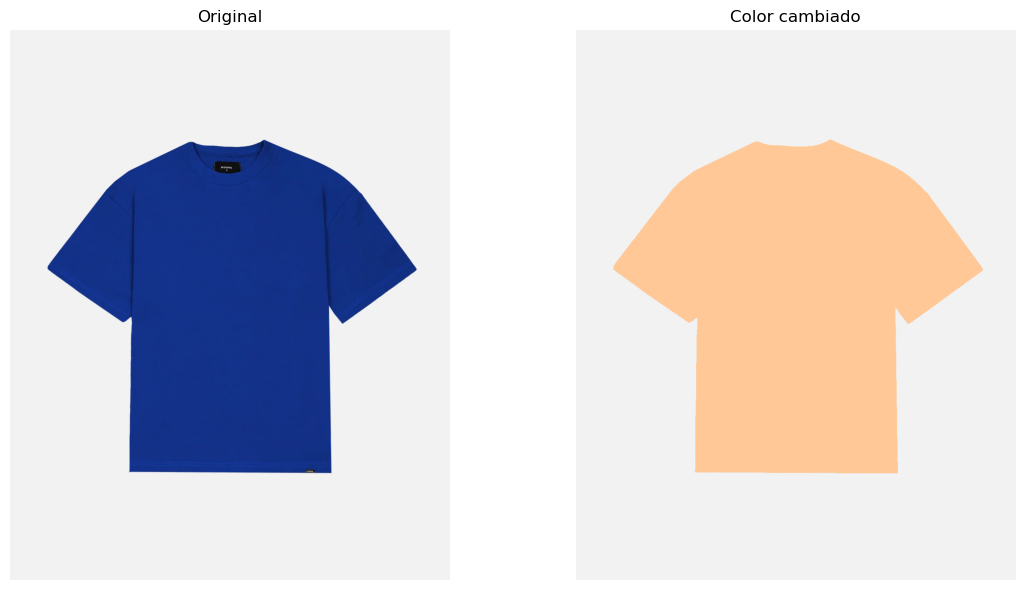

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


imagen = cv2.imread('poleraazul.jpg')
imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)


blur = cv2.GaussianBlur(imagen_gray, (5, 5), 0)


_, binary = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY_INV)


contornos, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contorno_blusa = max(contornos, key=cv2.contourArea)

mascara = np.zeros_like(imagen[:, :, 0])
cv2.drawContours(mascara, [contorno_blusa], -1, 255, -1)


nuevo_color = [150, 200, 255]
blusa_coloreada = np.zeros_like(imagen)
blusa_coloreada[:] = nuevo_color


mascara_3d = cv2.merge([mascara, mascara, mascara])
zona_blusa = cv2.bitwise_and(blusa_coloreada, mascara_3d)
fondo = cv2.bitwise_and(imagen, cv2.bitwise_not(mascara_3d))
resultado = cv2.add(zona_blusa, fondo)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Color cambiado')
plt.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


contador de objetos

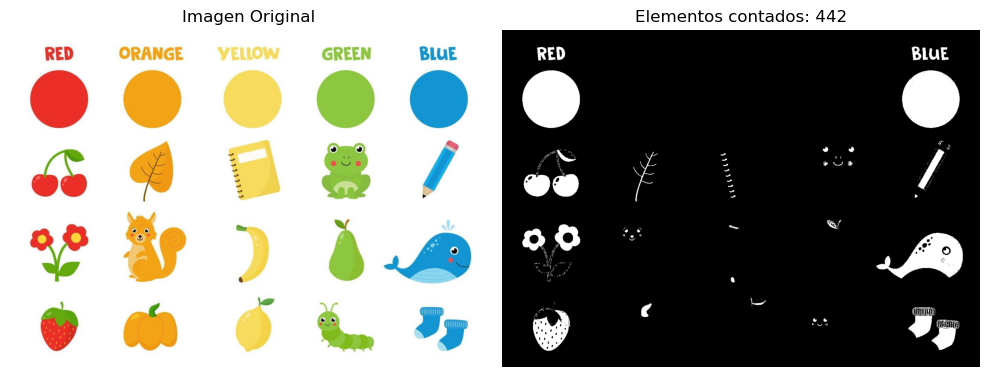

In [ ]:
from skimage import measure
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contar2(imag):
    # Convertir a escala de grises
    img_gray = cv2.cvtColor(imag, cv2.COLOR_BGR2GRAY)

    # Umbralizar (binario inverso)
    _, binarizada = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Etiquetar componentes conectados
    contorno = measure.label(binarizada, connectivity=2)

    # Contar el número de objetos (excluyendo fondo = etiqueta 0)
    cont = np.max(contorno)

    return cont, binarizada

# Leer imagen
imagen = cv2.imread('colores.jpg')

# Aplicar conteo
contado, bin = contar2(imagen)

# Mostrar resultados
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Elementos contados: {contado}')
plt.imshow(bin, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
